In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from sklearn.linear_model import LinearRegression,LassoCV, Ridge, LassoLarsCV,ElasticNetCV
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve

In [68]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [13]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ThreeSsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,20,RL,141,31770,Pave,none,IR1,Lvl,AllPub,...,0,0,0,none,0,5,2010,WD,Normal,215000
1,2,20,RH,80,11622,Pave,none,Reg,Lvl,AllPub,...,0,120,0,MnPrv,0,6,2010,WD,Normal,105000
2,3,20,RL,81,14267,Pave,none,IR1,Lvl,AllPub,...,0,0,0,none,12500,6,2010,WD,Normal,172000
3,4,20,RL,93,11160,Pave,none,Reg,Lvl,AllPub,...,0,0,0,none,0,4,2010,WD,Normal,244000
4,5,60,RL,74,13830,Pave,none,IR1,Lvl,AllPub,...,0,0,0,MnPrv,0,3,2010,WD,Normal,189900
5,6,60,RL,78,9978,Pave,none,IR1,Lvl,AllPub,...,0,0,0,none,0,6,2010,WD,Normal,195500
6,7,120,RL,41,4920,Pave,none,Reg,Lvl,AllPub,...,0,0,0,none,0,4,2010,WD,Normal,213500
7,8,120,RL,43,5005,Pave,none,IR1,HLS,AllPub,...,0,144,0,none,0,1,2010,WD,Normal,191500
8,9,120,RL,39,5389,Pave,none,IR1,Lvl,AllPub,...,0,0,0,none,0,3,2010,WD,Normal,236500
9,10,60,RL,60,7500,Pave,none,Reg,Lvl,AllPub,...,0,0,0,none,0,6,2010,WD,Normal,189000


In [116]:
train.dtype

Id                int64
MSSubClass        int64
MSZoning         object
LotFrontage       int64
LotArea           int64
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
MasVnrArea        int64
ExterQual        object
ExterCond        object
Foundation       object
                  ...  
BsmtHalfBath      int64
FullBath          int64
HalfBath          int64
BedroomAbvGr      int64
KitchenAbvGr      int64
KitchenQual      object
TotRmsAbvGrd      int64
Functional       object
Fireplaces        int64
FireplaceQu      object
GarageType      

In [121]:
categorical_colums = train.select_dtypes(include=['object']).columns
categorical_colums


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

In [39]:
cor = train.corr()["SalePrice"]
var_to_keep = cor[cor>0.6].keys()
train_new = train[var_to_keep]
train_new

,OverallQual,TotalBsmtSF,FirstFlrSF,GrLivArea,GarageCars,GarageArea,SalePrice
0,6,1080,1656,1656,2,528,215000
1,5,882,896,896,1,730,105000
2,6,1329,1329,1329,1,312,172000
3,7,2110,2110,2110,2,522,244000
4,5,928,928,1629,2,482,189900
5,6,926,926,1604,2,470,195500
6,8,1338,1338,1338,2,582,213500
7,8,1280,1280,1280,2,506,191500
8,8,1595,1616,1616,2,608,236500
9,7,994,1028,1804,2,442,189000


In [40]:
train_new.isnull().any().any()

False

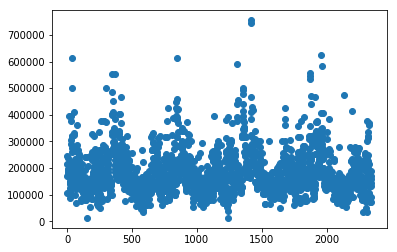

In [43]:
plt.scatter(train_new["SalePrice"].keys(),train_new["SalePrice"])

In [56]:
train_new = train_new[train_new["SalePrice"]<700000]
train_new = train_new[train_new["SalePrice"]>30000]

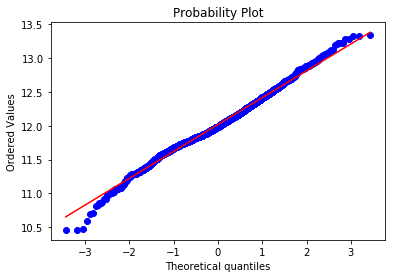

In [57]:
stats.probplot(np.log(train_new["SalePrice"]), dist="norm", plot=plt)
plt.show()

In [83]:
y_train = np.log(train_new["SalePrice"])
X_train = train_new.drop("SalePrice", axis=1)

In [66]:
clf = LinearRegression()

In [84]:
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [85]:
X_test = test[var_to_keep[0:len(var_to_keep)-1]]
X_test

,OverallQual,TotalBsmtSF,FirstFlrSF,GrLivArea,GarageCars,GarageArea
0,8,1650,1690,3279,3,841
1,8,559,1080,1752,2,492
2,4,864,864,864,2,400
3,6,1542,2073,2073,2,500
4,6,483,483,987,1,264
5,7,1517,1535,1535,2,532
6,7,764,764,1626,2,474
7,7,884,884,2035,2,434
8,8,1629,1645,2475,3,962
9,7,1720,1720,1720,2,527


In [91]:
predicted = clf.predict(X_test)

In [92]:
predicted

array([12.84934279, 12.29364529, 11.59951261, 12.24286422, 11.72895159,
       12.24766807, 12.13888533, 12.23345921, 12.69929277, 12.31429135,
       12.56698674, 12.24765211, 11.72714451, 12.00445861, 12.22609418,
       12.08870904, 12.27428552, 12.04374716, 12.04099584, 11.84101822,
       11.70153248, 11.79117135, 11.69830698, 11.81818586, 11.86900819,
       11.76791423, 12.05582241, 11.77495362, 11.79532017, 11.77527774,
       11.81701142, 11.88340335, 11.89414861, 11.56487983, 11.53667638,
       11.72474441, 11.92769409, 11.64675785, 12.23325606, 11.53481118,
       12.24237739, 11.41971199, 12.21361407, 12.28925889, 11.93465251,
       12.17271357, 12.65469052, 11.61959072, 11.41868543, 11.81666929,
       11.86817888, 12.20753072, 12.26460681, 12.30753311, 11.74910991,
       12.26068406, 12.1363048 , 11.78622116, 11.65938474, 11.30286035,
       12.6768767 , 12.03354646, 11.99928437, 12.24335245, 12.21325232,
       11.97947296, 12.73307977, 12.23372304, 12.12629904, 11.60

In [93]:
predicted = np.exp(predicted)
predicted

array([380538.55910408, 218304.31138673, 109044.63863898, 207495.35280493,
       124113.47992023, 208494.52790822, 187004.00817659, 205553.00493977,
       327516.19067558, 222858.28301475, 286928.04307132, 208491.1995428 ,
       123889.39956531, 163482.07133972, 204044.662573  , 177852.35920282,
       214118.63648925, 170032.88859897, 169565.71660462, 138831.77460066,
       120756.63091575, 132081.0927844 , 120367.75706461, 135697.83083189,
       142772.56509455, 129044.71195708, 172098.52500322, 129956.31307885,
       132630.21153504, 129998.44125232, 135538.5549196 , 144842.66333692,
       146407.42685118, 105332.76777971, 102403.52178063, 123592.40990545,
       151402.03867437, 114320.11851781, 205511.25144742, 102212.69688181,
       207394.36284666,  91099.90026042, 201513.98674504, 217348.83848724,
       152459.23219777, 193438.2400905 , 313229.2153146 , 111256.17674777,
        91006.42857033, 135492.19137747, 142654.21174699, 200291.82843209,
       212056.24114838, 2

In [99]:
subm_df = pd.read_csv('sample_submission.csv')
subm_df['SalePrice'] = predicted
subm_df.to_csv('Subm_1.csv', index=False)

In [108]:
lassocv = LassoCV(eps=1e-7) 
ridge = Ridge(alpha=1e-6) 
lassolarscv = LassoLarsCV()
elasticnetcv = ElasticNetCV(eps=1e-15)

In [104]:
def RMSE(estimator,X_train, Y_train, cv=5,n_jobs=4):
    cv_results = cross_val_score(estimator,X_train,Y_train,cv=cv,scoring="neg_mean_squared_error",n_jobs=n_jobs)
    return (np.sqrt(-cv_results)).mean()

In [110]:
RMSE(lassocv, X_train, y_train)
RMSE(ridge, X_train, y_train)
RMSE(lassolarscv, X_train, y_train)
RMSE(elasticnetcv, X_train, y_train)

0.2298198641165256

In [112]:
lassocv.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lassolarscv.fit(X_train, y_train)
elasticnetcv.fit(X_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [113]:
lassocv_predict = np.exp(lassocv.predict(X_test))
ridge_predict = np.exp(ridge.predict(X_test))
lassolarscv_predict = np.exp(lassolarscv.predict(X_test))
elasticnetcv_predict = np.exp(elasticnetcv.predict(X_test))

array([380544.09404735, 218298.54280547, 109038.90271882, 207492.49660146,
       124114.46212665, 208492.48532334, 186999.43426845, 205546.5638249 ,
       327530.04103957, 222856.32623019, 286910.24066231, 208502.18376808,
       123889.64072681, 163480.99285197, 204039.05513054, 177847.98033931,
       214111.06178448, 170039.94291513, 169564.09225438, 138828.54987931,
       120758.61320509, 132084.39263174, 120368.28363478, 135694.8398916 ,
       142773.8738546 , 129048.313495  , 172093.11761931, 129965.90950018,
       132636.92202083, 129998.64726074, 135536.35859861, 144849.96779706,
       146415.17058715, 105337.95667289, 102406.71604188, 123598.0791194 ,
       151401.39156425, 114327.19294087, 205520.48164871, 102223.51560048,
       207395.21843852,  91101.7604991 , 201511.46955096, 217337.52273757,
       152452.37466384, 193436.27079455, 313226.5765139 , 111258.83909841,
        91009.4791296 , 135497.42926402, 142645.3863188 , 200292.17516888,
       212052.15757541, 2

In [115]:
subm_df = pd.read_csv('sample_submission.csv')
subm_df['SalePrice'] = 0.25*lassocv_predict + 0.25*ridge_predict + 0.25*lassolarscv_predict + 0.25*elasticnetcv_predict
subm_df.to_csv('Subm_1.csv', index=False)